In [1]:
from utils.ClassicalSolver import DynamicGraph
from utils.QuantumSolver import QuantumQUBOSolver
from rustworkx.visualization import mpl_draw
import numpy as np

In [2]:
from qiskit_algorithms.utils import algorithm_globals
from qiskit_algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import (
    MinimumEigenOptimizer,
    RecursiveMinimumEigenOptimizer,
    SolutionSample,
    OptimizationResultStatus,
)
from qiskit_optimization import QuadraticProgram
from qiskit.visualization import plot_histogram
from typing import List, Tuple
import numpy as np

In [3]:
qubo = QuadraticProgram()
qubo.binary_var("x")
qubo.binary_var("y")
qubo.binary_var("z")
qubo.minimize(constant=3, linear=[1, -2, 3], quadratic={("x", "y"): 1, ("x", "z"): -1, ("y", "z"): 2})
print(qubo.prettyprint())

Problem name: 

Minimize
  x*y - x*z + 2*y*z + x - 2*y + 3*z + 3

Subject to
  No constraints

  Binary variables (3)
    x y z



In [4]:
op, offset = qubo.to_ising()
print("offset: {}".format(offset))
print("operator:")
print(op)

offset: 4.5
operator:
SparsePauliOp(['IIZ', 'IZI', 'ZII', 'IZZ', 'ZIZ', 'ZZI'],
              coeffs=[-0.5 +0.j,  0.25+0.j, -1.75+0.j,  0.25+0.j, -0.25+0.j,  0.5 +0.j])


In [5]:
algorithm_globals.random_seed = 10598
qaoa_mes = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_point=[0.0, 0.0])
exact_mes = NumPyMinimumEigensolver()

In [6]:
qaoa = MinimumEigenOptimizer(qaoa_mes)  # using QAOA
exact = MinimumEigenOptimizer(exact_mes)  # using the exact classical numpy minimum eigen solver

In [7]:
exact_result = exact.solve(qubo)
print(exact_result.prettyprint())

objective function value: 1.0
variable values: x=0.0, y=1.0, z=0.0
status: SUCCESS


In [8]:
qaoa_result = qaoa.solve(qubo)
print(qaoa_result.prettyprint())

objective function value: 1.0
variable values: x=0.0, y=1.0, z=0.0
status: SUCCESS


In [9]:
from utils.QuantumSolverV2 import QuantumQUBOSolver__V2

Q = np.array([
    [-3, 1, 1, 1],
    [1, -3, 1, 1],
    [1, 1, -3, 1],
    [1, 1, 1, -3]
], dtype=np.float64)

# Define the linear term (bias term)
c = np.array([0, 0, 0, 0], dtype=np.float64)

QUBOSolver = QuantumQUBOSolver__V2(Q, v=c)
QUBOSolver.solve()

objective function value: -4.0
variable values: x0=1.0, x1=1.0, x2=0.0, x3=0.0
status: SUCCESS


<MinimumEigenOptimizationResult: fval=-4.0, x0=1.0, x1=1.0, x2=0.0, x3=0.0, status=SUCCESS>

In [10]:
Q.shape, c.shape

((4, 4), (4,))

In [11]:
v = np.array([1,1,0,0])

v @ Q @ v.T

-4.0

In [12]:
from utils.ClassicalSolver import DynamicGraph
from utils.QuantumSolverV2 import QuantumQUBOSolver__V2

import numpy as np
from rustworkx.visualization import mpl_draw

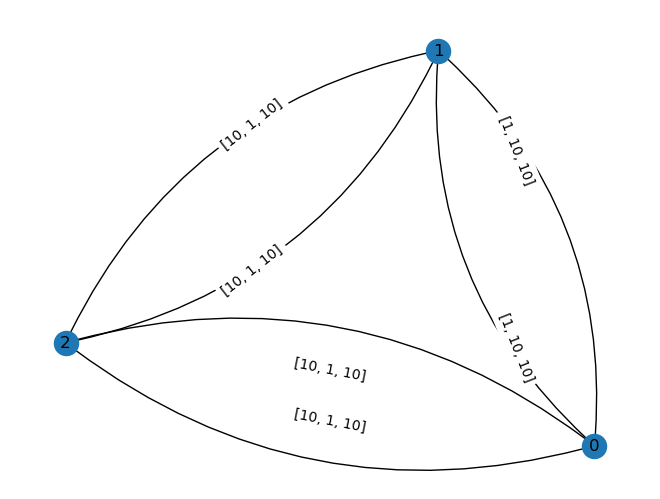

In [13]:
dynamicGraph = DynamicGraph(3)

W = {
    (0,1): [1,10,10],
    (1,0): [1,10,10],
    (1,2): [10,1,10],
    (2,1): [10,1,10],
    (2,0): [10,1,10],
    (0,2): [10,1,10],
}

maps = dynamicGraph.AssignDynamicWeights(W)


mpl_draw(dynamicGraph.DGraph, with_labels=True, edge_labels=str)

In [14]:
Q, c = dynamicGraph.GenerateQUBO(1e5)

In [15]:
Q.shape, c

((9, 9), 600000.0)

In [16]:
QUBOSolver = QuantumQUBOSolver__V2(Q, c=c)
QUBOSolver.solve()

objective function value: 2.0
variable values: x0=0.0, x1=1.0, x2=0.0, x3=1.0, x4=0.0, x5=0.0, x6=0.0, x7=0.0, x8=1.0
status: SUCCESS


<MinimumEigenOptimizationResult: fval=2.0, x0=0.0, x1=1.0, x2=0.0, x3=1.0, x4=0.0, x5=0.0, x6=0.0, x7=0.0, x8=1.0, status=SUCCESS>

In [17]:
Q

array([[-2.e+05,  2.e+05,  2.e+05,  2.e+05,  1.e+00,  0.e+00,  2.e+05,
         1.e+01,  0.e+00],
       [ 2.e+05, -2.e+05,  2.e+05,  0.e+00,  2.e+05,  1.e+01,  0.e+00,
         2.e+05,  1.e+00],
       [ 2.e+05,  2.e+05, -2.e+05,  0.e+00,  0.e+00,  2.e+05,  0.e+00,
         0.e+00,  2.e+05],
       [ 2.e+05,  1.e+00,  0.e+00, -2.e+05,  2.e+05,  2.e+05,  2.e+05,
         1.e+01,  0.e+00],
       [ 0.e+00,  2.e+05,  1.e+01,  2.e+05, -2.e+05,  2.e+05,  0.e+00,
         2.e+05,  1.e+00],
       [ 0.e+00,  0.e+00,  2.e+05,  2.e+05,  2.e+05, -2.e+05,  0.e+00,
         0.e+00,  2.e+05],
       [ 2.e+05,  1.e+01,  0.e+00,  2.e+05,  1.e+01,  0.e+00, -2.e+05,
         2.e+05,  2.e+05],
       [ 0.e+00,  2.e+05,  1.e+00,  0.e+00,  2.e+05,  1.e+00,  2.e+05,
        -2.e+05,  2.e+05],
       [ 0.e+00,  0.e+00,  2.e+05,  0.e+00,  0.e+00,  2.e+05,  2.e+05,
         2.e+05, -2.e+05]])

In [18]:
QUBOSolver.inspectQUBO()

Problem name: 

Minimize
  400000*x0*x1 + 400000*x0*x2 + 400000*x0*x3 + x0*x4 + 400000*x0*x6 + 10*x0*x7
  + 400000*x1*x2 + x1*x3 + 400000*x1*x4 + 10*x1*x5 + 10*x1*x6 + 400000*x1*x7
  + x1*x8 + 10*x2*x4 + 400000*x2*x5 + x2*x7 + 400000*x2*x8 + 400000*x3*x4
  + 400000*x3*x5 + 400000*x3*x6 + 10*x3*x7 + 400000*x4*x5 + 10*x4*x6
  + 400000*x4*x7 + x4*x8 + x5*x7 + 400000*x5*x8 + 400000*x6*x7 + 400000*x6*x8
  + 400000*x7*x8 - 200000*x0 - 200000*x1 - 200000*x2 - 200000*x3 - 200000*x4
  - 200000*x5 - 200000*x6 - 200000*x7 - 200000*x8 + 600000

Subject to
  No constraints

  Binary variables (9)
    x0 x1 x2 x3 x4 x5 x6 x7 x8

